In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import os 
import pathlib

import warnings 
warnings.simplefilter('ignore')
print(f'TensorFlow Version: {tf.__version__}')

TensorFlow Version: 2.8.2


In [9]:
url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
data_dir = tf.keras.utils.get_file(origin=url,
                                   fname='cats_and_dogs',
                                   extract=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

/root/.keras/datasets/cats_and_dogs


In [3]:
pic_list = list(pathlib.Path(f'{os.path.dirname(data_dir)}/PetImages').glob('*/*.jpg'))
print(len(pic_list))

25000


IMG Size:  (300, 400, 3)


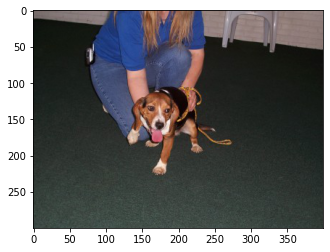

In [4]:
from keras.preprocessing.image import load_img, img_to_array

img = load_img(pic_list[30])
random_pic = img_to_array(img) / 255
plt.imshow(random_pic)
print("IMG Size: ", random_pic.shape)

In [12]:
data_dir = os.path.dirname(data_dir) + '/PetImages'
data_dir

'/root/.keras/datasets/PetImages'

In [17]:
img_size = 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed=123,
    shuffle=True,
    image_size=(img_size, img_size),
    batch_size = batch_size
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [22]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle=True,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


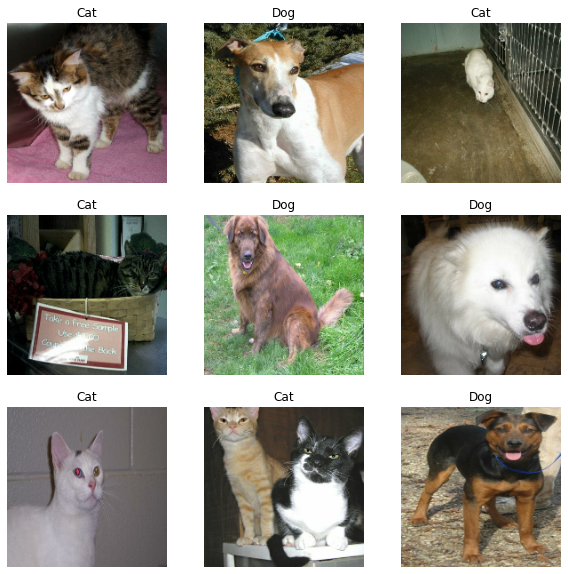

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(10):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [97]:
import tensorflow_datasets as tfds
train_data = tfds.as_numpy(train_ds)

In [100]:
x_train, y_train = next(iter(train_data))

In [101]:
print(x_train.shape)
print(y_train.shape)

(32, 180, 180, 3)
(32,)


In [141]:
next(iter(val_ds))[0].shape

TensorShape([32, 180, 180, 3])

In [157]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [146]:
# train_dataset = tf.data.Dataset.from_tensor_slices(train_ds)

ValueError: ignored

In [159]:
aa = []
bb = []
for a, b in train_data:
    aa.append(a)
    bb.append(b)

InvalidArgumentError: ignored

In [165]:
aa = np.array(aa).reshape(6816,180,180,3)

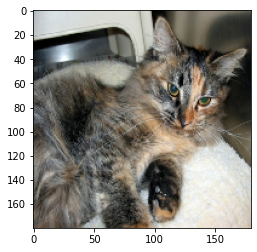

In [181]:
plt.imshow(aa[1]/255)

In [180]:
np.expand_dims(bb, axis=-1).reshape(6816)

array([1, 0, 0, ..., 0, 1, 1], dtype=int32)